In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train=pd.read_csv("titanic/train.csv")

In [3]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns
# Passenger ID - identifier, not a variable
# Survived - target
# Pclass - passenger class on ship

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# looks like we can drop PassengerID
train.drop(['PassengerId'], axis=1, inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


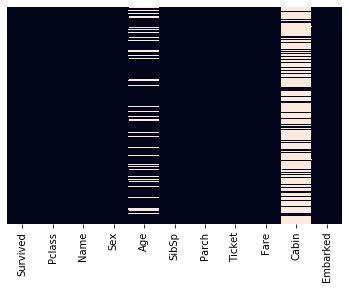

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)
# Cabin has many missing values, Age has quite some missing values

In [9]:
# analysing is Cabin and age should be excluded
age_na=train['Age'].isna().sum()
age_na=age_na/891*100
print(round(age_na,2), "% missing from Age column")

cabin_na=train['Cabin'].isna().sum()
cabin_na=cabin_na/891*100
print(round(cabin_na,2), "% missing from Cabin column")

19.87 % missing from Age column
77.1 % missing from Cabin column


In [10]:
# based on this the Cabin column should be dropped, will come back later

In [11]:
# checking class balance for survived
count_survived=train['Survived'].value_counts()/len(train['Survived'])*100
print(count_survived)

# class balance result: 40% survived, 60% did not

0    61.616162
1    38.383838
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Survived Class')

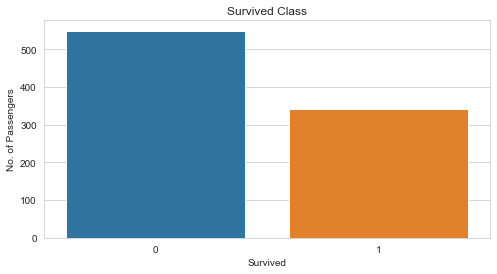

In [12]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)
plt.xlabel('Survived')
plt.ylabel('No. of Passengers')
plt.title('Survived Class')

male      64.758698
female    35.241302
Name: Sex, dtype: float64


'although there were 2x more men on board, looks like women had a higher chance of surviving: \nthis makes sense as women and children were allowed to board the life boats first.\n'

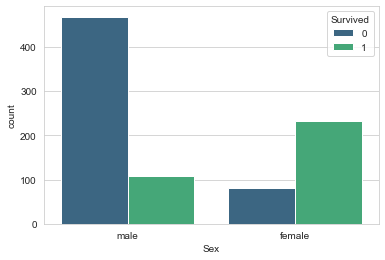

In [13]:
# let's examine the proportion of the other variables as well
gender_count=train['Sex'].value_counts()/len(train['Sex'])*100
print(gender_count)

sns.countplot(x='Sex',data=train,hue='Survived',palette='viridis')

"""although there were 2x more men on board, looks like women had a higher chance of surviving: 
this makes sense as women and children were allowed to board the life boats first.
"""

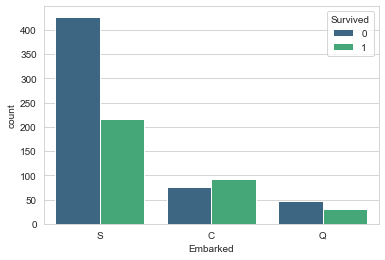

In [14]:
sns.countplot(x='Embarked',data=train,hue='Survived',palette='viridis')
#city where the passengers embarked from? Southampton smaller chance of survival

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


'\nhalf of the passengers were in third class, half combined in first and second class\n3rd class passengers died in larger proportions - around 1/4 chance of survival\n'

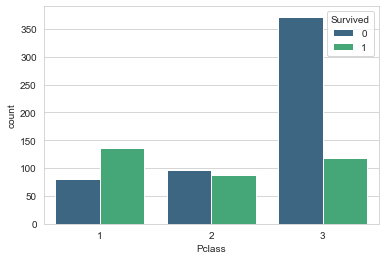

In [15]:
# same for passenger class
class_count=train['Pclass'].value_counts()/len(train['Pclass'])*100
print(class_count)

sns.countplot(x='Pclass',data=train,hue='Survived',palette='viridis')

"""
half of the passengers were in third class, half combined in first and second class
3rd class passengers died in larger proportions - around 1/4 chance of survival
"""

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

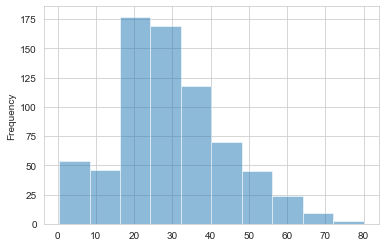

In [16]:
# looking at the age column - right tailed distribution, mean of 30
train['Age'].plot.hist(alpha=0.5,bins=10)
train['Age'].describe()

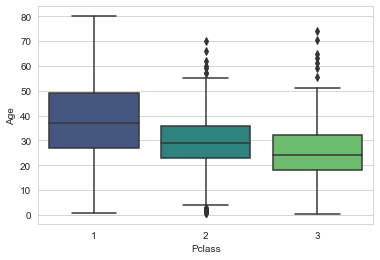

In [17]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='viridis')
# 1st class passengers were older

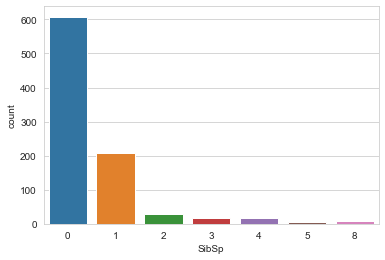

In [18]:
sns.countplot(x='SibSp',data=train) # very unbalanced column, should not use for now

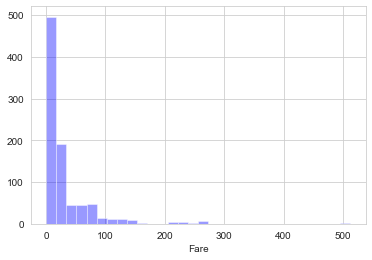

In [19]:
sns.distplot(train['Fare'],bins=30,kde=False,color='blue') # also skewed, not good without preprocessing?

In [20]:
train.groupby('Pclass', as_index=False)['Age'].mean()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [21]:
#for the missing Age values, it's a good idea to input the average age for the class in which the passenger is
def age_by_class(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [22]:
train['Age'] = train[['Age','Pclass']].apply(age_by_class,axis=1)

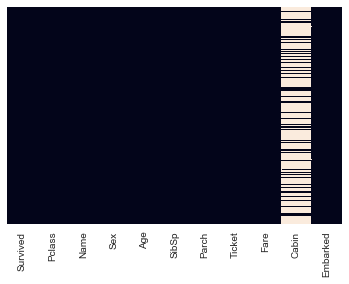

In [23]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)
# no more missing Age values, let's drop cabin

In [24]:
# drop Cabin column
train.drop(['Cabin'], axis=1, inplace=True)

In [25]:
#let's drop the other columns we are not using as well (identifier columns)
train.drop(['Name','Parch','Ticket'],axis=1,inplace=True)

In [26]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


#### Preparing dataset for classification

In [27]:
# encoding the categorical values
sex = pd.get_dummies(train['Sex'],drop_first=True)
embarked = pd.get_dummies(train['Embarked'],drop_first=True)
pclass = pd.get_dummies(train['Pclass'],drop_first=True)

In [28]:
# drop columns which we replace with dummies later / drop the name variable for good
train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [29]:
train = pd.concat([train,sex,embarked],axis=1)

In [30]:
train.head()

,Survived,Pclass,Age,SibSp,Fare,male,Q,S
0,0,3,22.0,1,7.2500,1,0,1
1,1,1,38.0,1,71.2833,0,0,0
2,1,3,26.0,0,7.9250,0,0,1
3,1,1,35.0,1,53.1000,0,0,1
4,0,3,35.0,0,8.0500,1,0,1


#### Split the train dataset 

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=100)

#### Train a classification model

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logistic_mod = LogisticRegression()
logistic_mod.fit(X_train,y_train)

/Users/ancai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
predictions = logistic_mod.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.78      0.65      0.71       109

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



#### Trying a weighted classification model

In [38]:
logistic_mod_weighted = LogisticRegression(class_weight = {0:0.60, 1:0.40}) 
logistic_mod_weighted.fit(X_train, y_train)

/Users/ancai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 0.6, 1: 0.4}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predictions_weighted = logistic_mod_weighted.predict(X_test)

In [40]:
print(classification_report(y_test,predictions_weighted)) 

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       159
           1       0.83      0.60      0.70       109

    accuracy                           0.79       268
   macro avg       0.80      0.76      0.77       268
weighted avg       0.79      0.79      0.78       268



In [41]:
import sklearn.metrics as sklm

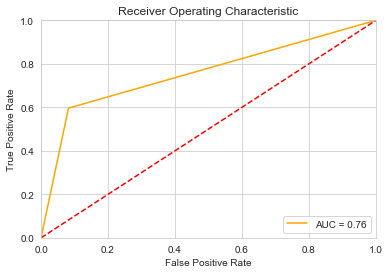

In [42]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs)
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, predictions_weighted)  

#### Input new dataset for testing and make predictions

In [43]:
test=pd.read_csv("titanic/test.csv")
print(test.shape)

(418, 11)


In [44]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
age_na=test['Age'].isna().sum()
age_na
#there are missing age values in the test file as well - let's use the function to fill them in

86

In [46]:
test['Age'] = test[['Age','Pclass']].apply(age_by_class,axis=1)

In [47]:
# encoding the new dataset - make dummies and remove columns we don't need
test.drop(['Cabin','PassengerId','Name','Parch','Ticket'],axis=1,inplace=True)

In [48]:
# encoding the categorical values
sex = pd.get_dummies(test['Sex'],drop_first=True)
embarked = pd.get_dummies(test['Embarked'],drop_first=True)

In [49]:
# drop columns which we replace with dummies later / drop the name variable for good
test.drop(['Sex','Embarked'],axis=1,inplace=True)

In [50]:
test = pd.concat([test,sex,embarked],axis=1)

In [51]:
test.iloc[152,]
#there is a missing value for fare but this is not caught by the dropna function, will need to delete by index

Pclass     3.0
Age       60.5
SibSp      0.0
Fare       NaN
male       1.0
Q          0.0
S          1.0
Name: 152, dtype: float64

In [52]:
test.at[152, 'Fare'] = 0

In [53]:
test.shape

(418, 7)

In [54]:
test_predictions = logistic_mod_weighted.predict(test)

In [55]:
result=pd.read_csv("titanic/gender_submission.csv")

In [56]:
result.shape

(418, 2)

In [58]:
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [59]:
result['Survived']=test_predictions

In [60]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [62]:
result.to_csv('ResultPredictionsTitanic.csv', index = False, header = True)